In [177]:
#импорт основных библиотек

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [178]:
#импорт датасета

from google.colab import files 
uploaded = files.upload()

Saving КР-1.xlsx to КР-1 (3).xlsx


In [179]:
#начальный вид датасета

df = pd.read_excel('КР-1.xlsx', sheet_name='Вар (1)')
df

,Площадь загальна кв.м,Этаж,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
0,9.00,1,1,Соціальний,NaN,571.0,1.56,108.0,13884.0,0,0,0,0,1
1,30.00,1,1,Соціальний,8.0,1197.0,2.03,750.0,11700.0,0,0,0,1,1
2,15.00,1,1,Соціальний,NaN,402.0,1.81,0.0,6786.0,0,0,0,1,1
3,20.00,1,1,Стандартний,NaN,1036.0,2.18,0.0,12948.0,0,0,0,1,1
4,30.00,1,1,Соціальний,NaN,513.0,1.63,0.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1,3,Преміальний,4.0,6669.0,1.89,963.0,9399.0,0,0,0,0,0
65,27.26,1,2,Преміальний,3.0,2877.0,1.85,0.0,14079.0,0,1,1,0,0
66,148.91,1,1,Стандартний,12.0,2146.0,1.99,315.0,11427.0,0,0,0,0,0
67,50.93,1,2,Соціальний,17.0,413.0,1.73,0.0,13338.0,0,1,1,0,0


In [180]:
#проверка на нулевые значения. Видим, что особенно в этом плане выделяется количество отзывов

df.isna().sum()

Площадь загальна кв.м                  0
Этаж                                   0
Количество сотрудников в магазине      0
Тип                                    0
Кількість відгуків в гуглі            30
Количество чеков                       0
Среднее количество единиц в чеке       7
Населення                              5
Середній дохід наелення,грн            5
Магазин мобільного звязку              0
Продуктовий ринок                      0
Речовий ринок                          0
Транзитна зупинка міжміського ГТ       0
Зупинка ГТ                             0
dtype: int64

In [181]:
#!pip install sklearn

In [182]:
#заполним все пропуски, так как у нас достаточно мало данных

dfm = df

from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(dfm[['Кількість відгуків в гуглі']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(dfm[['Среднее количество единиц в чеке']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Населення']] = imputer_mean.fit_transform(dfm[['Населення']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Середній дохід наелення,грн']] = imputer_mean.fit_transform(dfm[['Середній дохід наелення,грн']]).round()

In [183]:
#подробная статистика всех переменных. Видим, что у нас есть и бинарные переменные в большом количестве. Далее рассмотрим каждый из параметров более подробно и выберем тот, который будем прогнозировать

df.describe()

,Площадь загальна кв.м,Этаж,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ
count,69.000000,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,1.0,1.869565,42.898551,3021.576882,1.971014,295.956522,11306.855072,0.057971,0.173913,0.130435,0.101449,0.362319
std,37.862989,0.0,0.838645,61.280489,1904.285820,0.240772,310.467836,2347.336283,0.235401,0.381812,0.339248,0.304135,0.484192
min,4.000000,1.0,1.000000,1.000000,369.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,1.0,1.000000,12.000000,1651.000000,2.000000,0.000000,10296.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,1.0,2.000000,43.000000,2679.000000,2.000000,253.000000,11427.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,1.0,2.000000,43.000000,3826.000000,2.000000,545.000000,12948.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,232.300000,1.0,4.000000,367.000000,7852.000000,3.000000,963.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
#для удобства работы необходимо переименовать все колонки, в том числе, чтобы построить графики распределения

df.rename(columns={'Площадь загальна кв.м': 'square'}, inplace=True)
df.rename(columns={'Этаж': 'floor'}, inplace=True)
df.rename(columns={'Количество чеков': 'receipt'}, inplace=True)
df.rename(columns={'Кількість відгуків в гуглі': 'Google_marks'}, inplace=True)
df.rename(columns={'Среднее количество единиц в чеке': 'midQ_receipt'}, inplace=True)
df.rename(columns={'Населення': 'People'}, inplace=True)
df.rename(columns={'Середній дохід наелення,грн': 'mid_income'}, inplace=True)
df.rename(columns={'Магазин мобільного звязку': 'mobile'}, inplace=True)
df.rename(columns={'Продуктовий ринок': 'food_market'}, inplace=True)
df.rename(columns={'Речовий ринок': 'product_market'}, inplace=True)
df.rename(columns={'Транзитна зупинка міжміського ГТ': 'int_stop'}, inplace=True)
df.rename(columns={'Зупинка ГТ': 'city_stop'}, inplace=True)
df.rename(columns={'Тип': 'type'}, inplace=True)
df.rename(columns={'Количество сотрудников в магазине ': 'ds'}, inplace=True)

In [185]:
#проверка типов данных. Один из параметров - текстовый и категориальный, что будет важно в дальнейшем

df.dtypes

square            float64
floor               int64
ds                  int64
type               object
Google_marks      float64
receipt           float64
midQ_receipt      float64
People            float64
mid_income        float64
mobile              int64
food_market         int64
product_market      int64
int_stop            int64
city_stop           int64
dtype: object

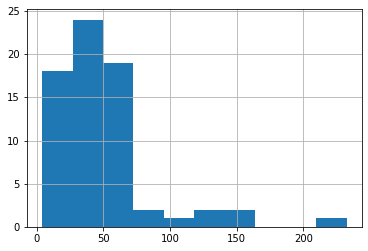

In [186]:
#распределение площади. По нему видно, что есть небольшой крупный отдельный выброс, который мы удалим без использования дополнительных иструментов

df.square.hist()
df = df.loc[df['square'] < 180]

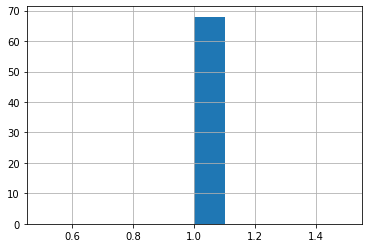

In [187]:
#переменная, у которой только 1 значение. Очевидно, что не несет никакого смысла
df.floor.hist()

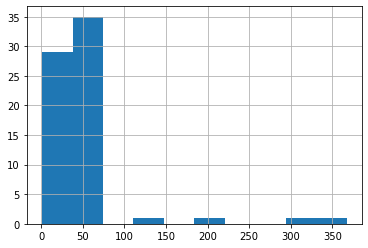

In [188]:
#несмотря на наличие выбросов, тут они носят логичный характер и, после заполнения пропущенных участков выглядят адекватно. Тем не менее, на мой взгляд, количество отзывов не повлияют на переменную, которую хотелось бы изучить

df.Google_marks.hist()

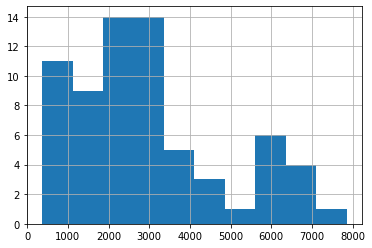

In [189]:
#переменная, которую хотелось бы объяснить. Нормальное распределение, и в целом интересно оценить количество чека в зависимости от неких переменных

df.receipt.hist()

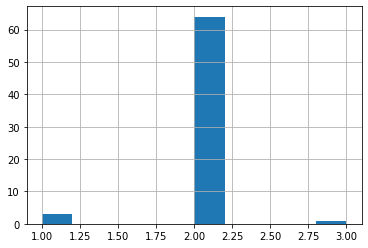

In [190]:
#бесполезная переменная с парой выбросов. Будет удалена

df.midQ_receipt.hist()

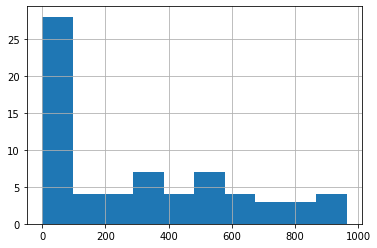

In [191]:
#Население - ок переменная для анализа с адекватным распределением. Возможно, можно было бы ее логарифмировать, но этого делать не будем

df.People.hist()

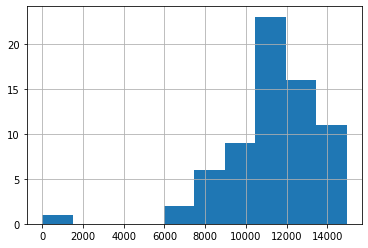

In [192]:
#средний доход. Одна из ключевых переменных. Удаляем выброс с аномально низким значением и двигаемся дальше.
df.mid_income.hist()
df = df.loc[df['mid_income'] > 5000]

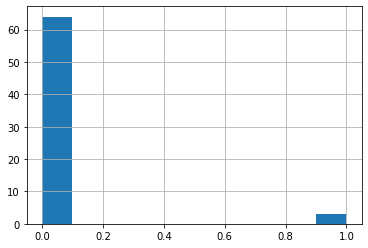

In [193]:
#бинарная переменная без особого интереса - слишком малое кол-во этих мобильных точек. Будет удалена

df.mobile.hist()

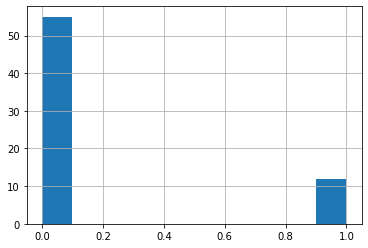

In [194]:
#бинарная переменная. Оставим для исследования.

df.food_market.hist()

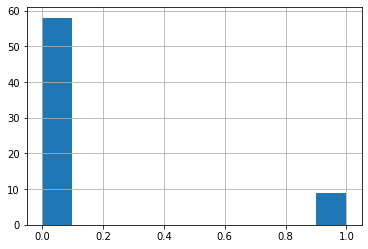

In [195]:
#бинарная переменная. Оставим для исследования.

df.product_market.hist()

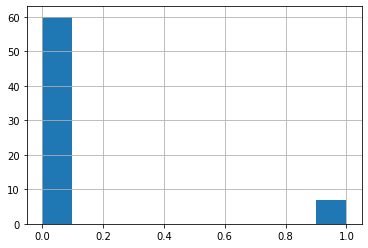

In [196]:
#бинарная переменная. Все же принял ее оставить, возможно, она достаточно влияет на формирование цены
df.int_stop.hist()

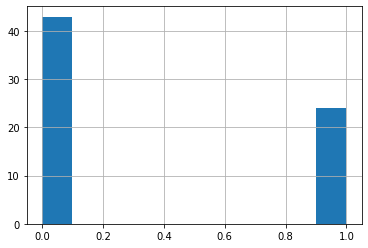

In [197]:
#хорошая бинарная переменная

df.city_stop.hist()

In [198]:
#бинарное кодирование категориальной переменной с типом магазина. Тип точно влияет на чек, и мы должны создать отдельные переменные

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse=False categorical_features=...
new_ohe_features = ohe.fit_transform(df.type.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['type' + str(i) for i in range(new_ohe_features.shape[1])])
df = pd.concat([df, tmp], axis=1)
df

,square,floor,ds,type,Google_marks,receipt,midQ_receipt,People,mid_income,mobile,food_market,product_market,int_stop,city_stop,type0,type1,type2,type3,type4
0,9.00,1.0,1.0,Соціальний,43.0,571.0,2.0,108.0,13884.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,30.00,1.0,1.0,Соціальний,8.0,1197.0,2.0,750.0,11700.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,15.00,1.0,1.0,Соціальний,43.0,402.0,2.0,0.0,6786.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,20.00,1.0,1.0,Стандартний,43.0,1036.0,2.0,0.0,12948.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,30.00,1.0,1.0,Соціальний,43.0,513.0,2.0,0.0,11427.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1.0,3.0,Преміальний,4.0,6669.0,2.0,963.0,9399.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65,27.26,1.0,2.0,Преміальний,3.0,2877.0,2.0,0.0,14079.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
66,148.91,1.0,1.0,Стандартний,12.0,2146.0,2.0,315.0,11427.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67,50.93,1.0,2.0,Соціальний,17.0,413.0,2.0,0.0,13338.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


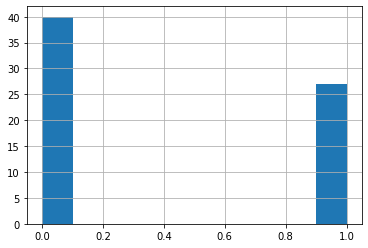

In [199]:
#бинарная переменная. Оставим для исследования.

df.type0.hist()

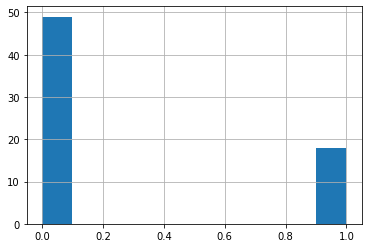

In [200]:
#бинарная переменная. Оставим для исследования.

df.type1.hist()

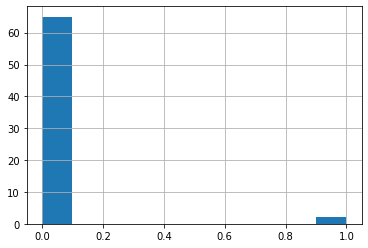

In [201]:
#бинарная переменная. Слишком редкая и может создать перекос в модели, удаляем

df.type2.hist()

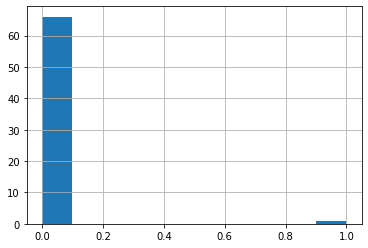

In [202]:
#бинарная переменная. Слишком редкая и может создать перекос в модели, удаляем. Добавлять им замену не будем, пусть эти типы будут пропущены

df.type3.hist()

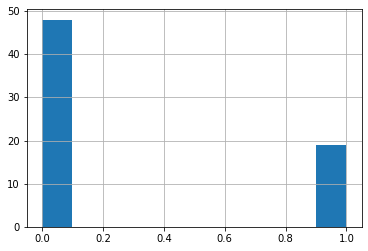

In [203]:
#бинарная переменная. Оставим для исследования.

df.type4.hist()

In [204]:
#Удаляем лишние колонки и заполняем 0 пропущенные в категориальных переменных значения(так как оставшиеся 3 магазина не относятся ни к одному из типов)

df = df.drop(columns = ['type3'], );
df = df.drop(columns = ['type2'], );
df = df.drop(columns = ['midQ_receipt'], );
df = df.drop(columns = ['mobile'], );
df = df.drop(columns = ['floor'], );
df = df.drop(columns = ['type'], );
df = df.drop(columns = ['Google_marks'], );
df = df.fillna(0) 

In [205]:
#поменяем порядок колонок и выделим объясняемую переменную справа

new_order = [0,1,3,4, 5,6,7,8,9,10,11,2]
df = df[df.columns[new_order]]
df

,square,ds,People,mid_income,food_market,product_market,int_stop,city_stop,type0,type1,type4,receipt
0,9.00,1.0,108.0,13884.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,571.0
1,30.00,1.0,750.0,11700.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1197.0
2,15.00,1.0,0.0,6786.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,402.0
3,20.00,1.0,0.0,12948.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1036.0
4,30.00,1.0,0.0,11427.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,3.0,963.0,9399.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6669.0
65,27.26,2.0,0.0,14079.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2877.0
66,148.91,1.0,315.0,11427.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2146.0
67,50.93,2.0,0.0,13338.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,413.0


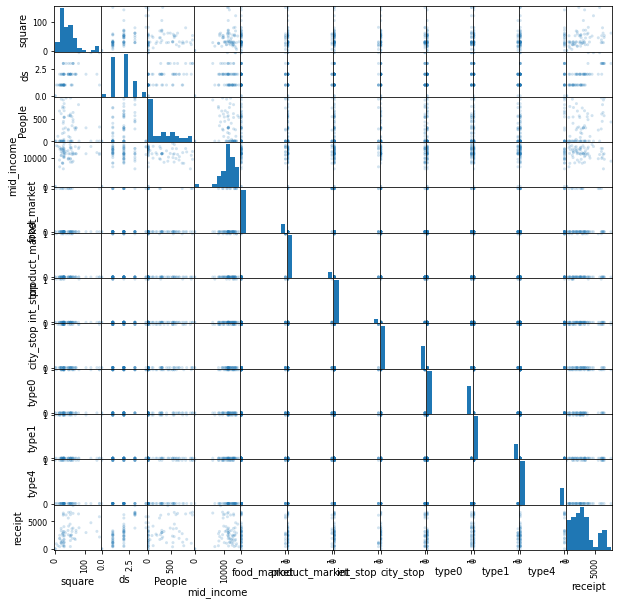

In [206]:
#построим матрицу корреляций. Никаких выводов по ней сделать не можем.

from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

In [207]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['receipt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [208]:
#!pip install statsmodels

In [209]:

from sklearn.linear_model import LinearRegression

In [210]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

0.657

In [211]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                receipt   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     7.474
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           5.68e-07
Time:                        17:53:49   Log-Likelihood:                -466.86
No. Observations:                  55   AIC:                             957.7
Df Residuals:                      43   BIC:                             981.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -112.2572   1085.705     -0.103      0.918   -2301.791    2077.276
square            -6.8511      9.298     -0.737      0.465     -25.602      11.900
ds              1756.1715    308.598      5.691      0.000    1133.824    2378.519
People             0.0121      0.689      0.018      0.986      -1.377       1.401
mid_income        -0.0222      0.072     -0.307      0.760      -0.168       0.124
food_market     -364.0311    660.129     -0.551      0.584   -1695.308     967.246
product_market   451.6519    736.271      0.613      0.543   -1033.180    1936.484
int_stop        -999.2337    759.197     -1.316      0.195   -2530.300     531.832
city_stop        543.2856    411.394      1.321      0.194    -286.370    1372.941
type0              7.7813    783.314      0.010      0.992   -1571.922    1587.484
type1           -113.5785    779.549     -0.146      0.885   -1685.690    1458.533
type4           1071.5901    772.309      1.388      0.172    -485.919    2629.099
==============================================================================
Omnibus:                        0.342   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.179
Skew:                          -0.139   Prob(JB):                        0.914
Kurtosis:                       2.971   Cond. No.                     9.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
#Построение многофакторной регресси дало сравнительно неплохой результат со всеми фичами - некая зависимость действительно есть. Тем не менее огромные оценки говорят про наличие мультиколлинеарности в модели. 
#Судя по p-значениям, для большой модели стоит взять количество сотрудников, последний тип магазина и количество междугородних остановок

In [213]:
#применяем метод последовательного исключения для нахождения лучших фич

from sklearn.feature_selection import RFE

names = [	'square'	'ds'	'People'	'mid_income'	'food_market'	'product_market'	'int_stop'	'city_stop'	'type0'	'type1'	'type4'	'receipt']
array = df.values
X = array[:,0:11]
Y = array[:,11]
model = LinearRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)

In [214]:
#видим, что те же три параметра проходят и тут ('ds','int_stop'	'type4')
fit.n_features_
fit.support_
fit.ranking_

array([ 9,  1, 10, 11,  4,  5,  3,  8,  6,  7,  2])

In [215]:
#меняем формат массивов на датасеты

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [216]:
# Шкалируем данные 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [217]:
#устанавливаем нужные библиотеки для НС

#!pip install tensorflow
#!pip install keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


In [218]:

# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(12, activation = 'tanh', input_dim = 11))

# Adding the second hidden layer
rnn.add(Dense(7, activation = 'tanh'))


# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [219]:
# Fitting the ANN to the Training set
k = rnn.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
6/6 [==============================] - 1s 28ms/step - loss: 0.9655 - accuracy: 0.0000e+00 - val_loss: 0.7101 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9072 - accuracy: 0.0000e+00 - val_loss: 0.6834 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.8582 - accuracy: 0.0000e+00 - val_loss: 0.6555 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8202 - accuracy: 0.0000e+00 - val_loss: 0.6292 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7719 - accuracy: 0.0000e+00 - val_loss: 0.6141 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7399 - accuracy: 0.0000e+00 - val_loss: 0.5937 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7052 - accuracy: 0.0000e+00 - val_loss: 0.58

In [220]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

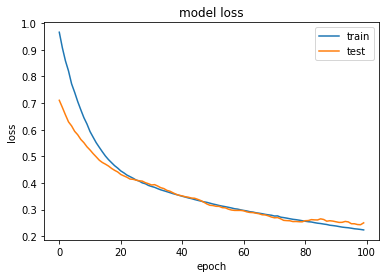

In [221]:
# Plotting loss & accuracy
plt.figure()
plt.plot(k.history['loss'])
plt.plot(k.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [222]:
#Стоит отметить, что на примерно 40-80 эпохах у нас практически нет никакого разрыва! Попробуем построить, возьмем 80 эпох.

In [223]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [224]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(944.64, 1003.644)

In [225]:
#testing the best features

df = df.drop(columns = ['square'], );
df = df.drop(columns = ['People'], );
df = df.drop(columns = ['mid_income'], );
df = df.drop(columns = ['food_market'], );
df = df.drop(columns = ['product_market'], );
df = df.drop(columns = ['city_stop'], );
df = df.drop(columns = ['type0'], );
df = df.drop(columns = ['type1'], );
df

,ds,int_stop,type4,receipt
0,1.0,0.0,0.0,571.0
1,1.0,1.0,0.0,1197.0
2,1.0,1.0,0.0,402.0
3,1.0,1.0,1.0,1036.0
4,1.0,0.0,0.0,513.0
...,...,...,...,...
64,3.0,0.0,1.0,6669.0
65,2.0,0.0,0.0,2877.0
66,1.0,0.0,0.0,2146.0
67,2.0,0.0,0.0,413.0


In [232]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(12, activation = 'tanh', input_dim = 11))

# Adding the second hidden layer
rnn.add(Dense(7, activation = 'tanh'))


# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [233]:
# Fitting the ANN to the Training set
k = rnn.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test), epochs = 80)

Epoch 1/80
6/6 [==============================] - 1s 28ms/step - loss: 1.7183 - accuracy: 0.0000e+00 - val_loss: 32705098022912.0000 - val_accuracy: 0.0000e+00
Epoch 2/80
6/6 [==============================] - 0s 5ms/step - loss: 1.6213 - accuracy: 0.0000e+00 - val_loss: 32705098022912.0000 - val_accuracy: 0.0000e+00
Epoch 3/80
6/6 [==============================] - 0s 6ms/step - loss: 1.5298 - accuracy: 0.0000e+00 - val_loss: 32705098022912.0000 - val_accuracy: 0.0000e+00
Epoch 4/80
6/6 [==============================] - 0s 5ms/step - loss: 1.4526 - accuracy: 0.0000e+00 - val_loss: 32705098022912.0000 - val_accuracy: 0.0000e+00
Epoch 5/80
6/6 [==============================] - 0s 5ms/step - loss: 1.3819 - accuracy: 0.0000e+00 - val_loss: 32705095925760.0000 - val_accuracy: 0.0000e+00
Epoch 6/80
6/6 [==============================] - 0s 5ms/step - loss: 1.3052 - accuracy: 0.0000e+00 - val_loss: 32705095925760.0000 - val_accuracy: 0.0000e+00
Epoch 7/80
6/6 [=============================

In [234]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [235]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [236]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(1072.277, 11470571538.056)

In [231]:
# В целом стоит заметить, что НС не справились с этой моделью. Видимо, для данной зависимости достаточно простой линейной регресси, а вот НС сильно переобучается и оценки сильно смещаются. \
# Возможно, это связано со специфичным набором исходных данных и большим количеством категориальных переменных.